In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')
sns.set_palette('colorblind')

In [2]:
df = pd.read_csv('data/energy4.csv')
df.rename(columns={'runtime': 'Runtime (s)', 'package-0': 'RAPL (J)', 'X-Electricity-Consumed-Total': 'INA (J)'}, inplace=True)
df['Language'] = df['nea'].apply(lambda x: x.split(':')[0])
df['Example'] = df['nea'].apply(lambda x: x.split(':')[1])
df.drop('nea', axis=1, inplace=True)

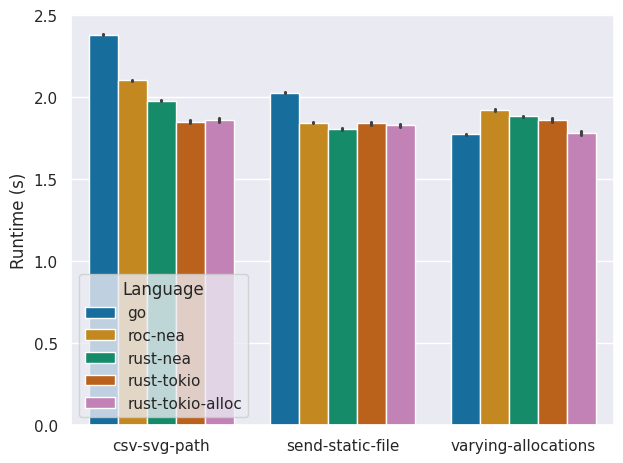

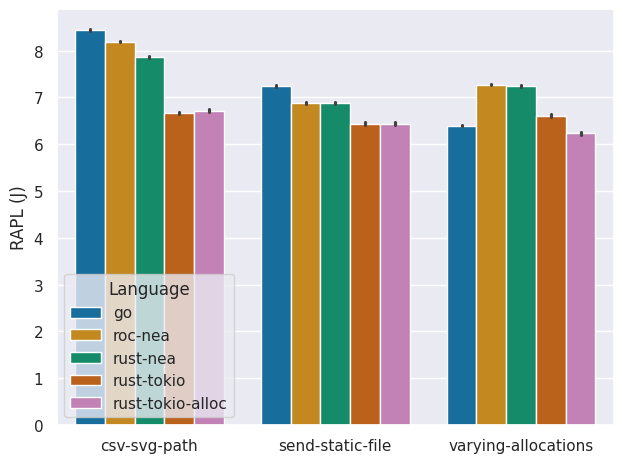

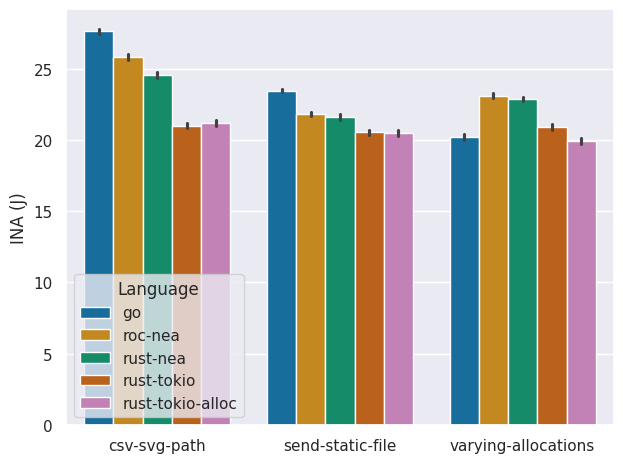

In [3]:
for y in ['Runtime (s)', 'RAPL (J)', 'INA (J)']:
    name = y.split(' ')[0].lower()
    ax = sns.barplot(df, x='Example', y=y, hue='Language')
    ax.set_xlabel('')

    plt.tight_layout()
    plt.savefig(f'images/alloc-{name}.png', bbox_inches='tight')
    plt.show()

    # Also save a figure without the current-thread allocator
    df2 = df[df['Language'] != 'rust-tokio-alloc']
    ax = sns.barplot(df2, x='Example', y=y, hue='Language')
    ax.set_xlabel('')

    plt.tight_layout()
    plt.savefig(f'images/{name}.png', bbox_inches='tight')
    plt.close()